#Car Price Prediction


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

# Loading the data

In [2]:
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preprocessing

In [3]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# check if there are any outliers
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


there are no outliers

# Feature Engineering

In [6]:
# Creating a new feature called 'Car_age', It's important to know how many years old the car is.
df['Car_age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

In [7]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# Exploratory Data Analysis

**1. Data Visualization**

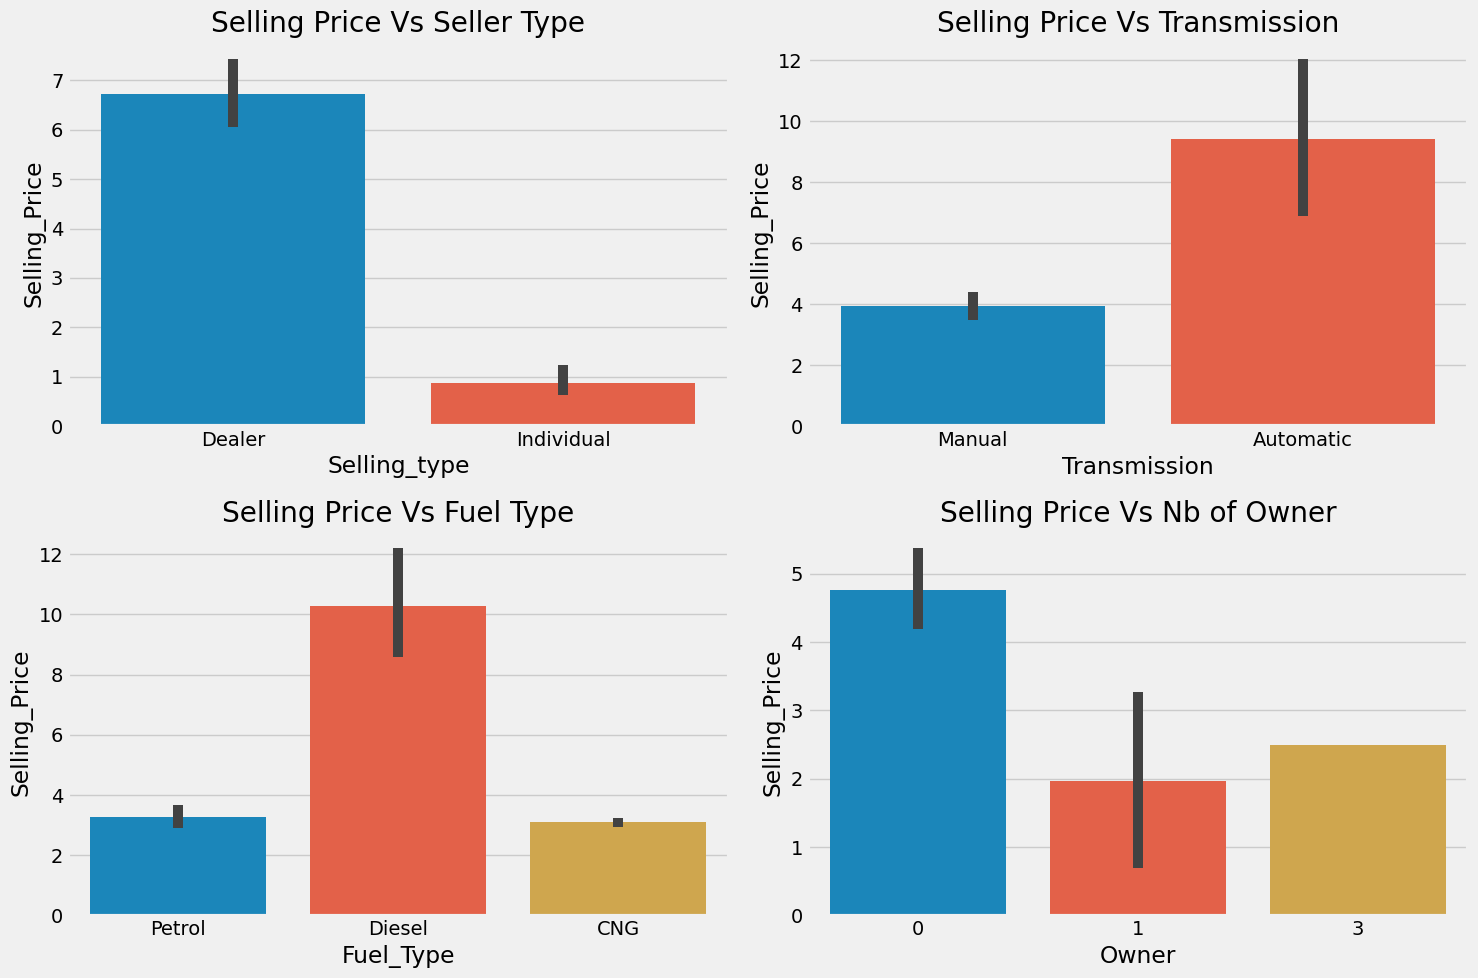

In [8]:
# Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

**Observations:**
* Compared to individuals, we have a higher selling price when sold by dealers.
* Autonomous cars would have a higher selling price.
* Cars with diesel fuel have a higher selling price than those with petrol or CNG.
* The selling price of used cars is high, with fewer owners

Text(0.5, 1.0, 'Selling Price Vs Car Age')

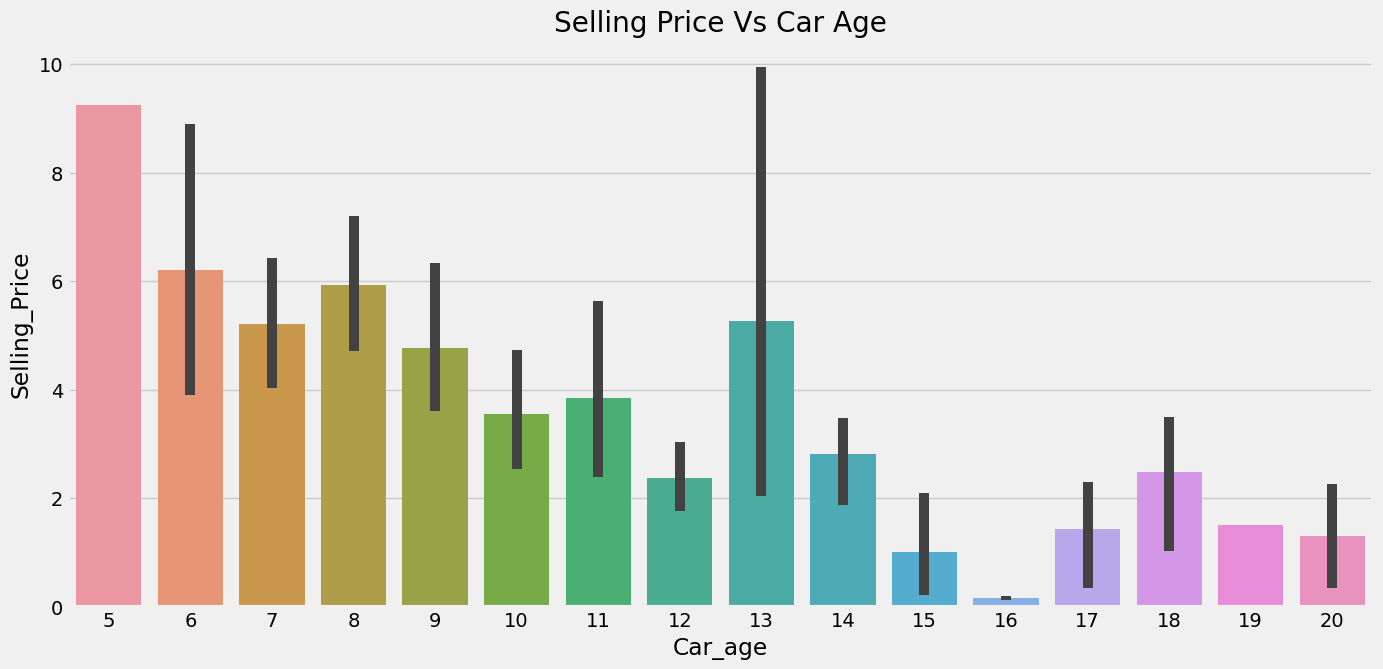

In [9]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

**Observations:**
* The selling price of a car that is five years old is high and starts to drop when the car is twenty years old.


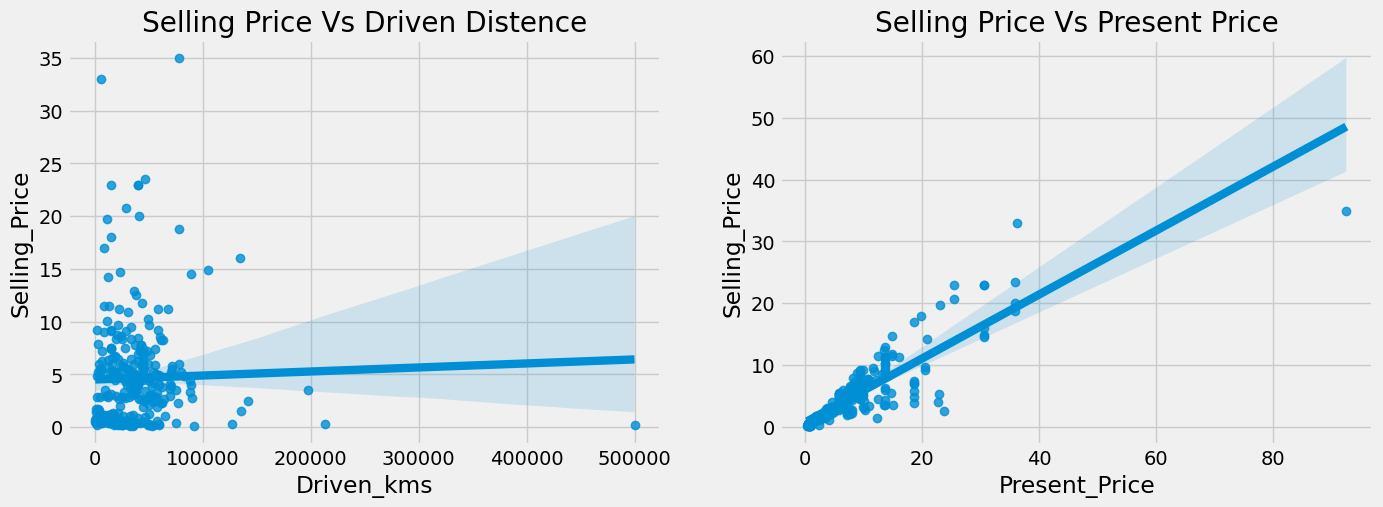

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')

plt.subplot(1,2,2)
sns.regplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()

**Observations:**
* The selling price increases with decreasing driven distance
* The selling price of cars typically rises as the present price does.


**2. Dealing with Categorical Variables**

In [11]:
cat_col = ['Fuel_Type','Selling_type','Transmission','Car_Name']
for i in cat_col:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [12]:
# In Car Name column There are three hundred and twelve unique name.
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)

In [13]:
# Dealing With Categorical Variables, creating dummie
col = ['Fuel_Type','Selling_type','Transmission']
df_new = pd.concat([df]+[pd.get_dummies(df[i],drop_first=True,prefix=i+'_') for i in col],axis=1)
df_new.drop(['Fuel_Type','Selling_type','Transmission'],axis=1,inplace=True)
df_new.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type__Diesel,Fuel_Type__Petrol,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


# Checking Multicollinearity Using VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_new[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type__Diesel','Fuel_Type__Petrol','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.211044,Present_Price
1,2.888998,Driven_kms
2,1.086964,Owner
3,16.194782,Car_age
4,5.395420,Fuel_Type__Diesel
5,16.933491,Fuel_Type__Petrol
6,2.231970,Selling_type__Individual
7,8.440614,Transmission__Manual


In [15]:
# Car_age and fuel_type_petrol feature has high VIF
df_no_multicolinearity = df_new.drop(['Driven_kms','Fuel_Type__Petrol'],axis=1)

In [16]:
# cheking again after removing some correlated feature
variables = df_new[['Present_Price','Driven_kms','Owner','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.200856,Present_Price
1,1.883550,Driven_kms
2,1.065891,Owner
3,1.669331,Fuel_Type__Diesel
4,1.748706,Selling_type__Individual
5,2.465837,Transmission__Manual


* Now we have VIF < 5 and hence there is no Multicollinearity occurrence in our model

# Feature Selection
Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

<Axes: >

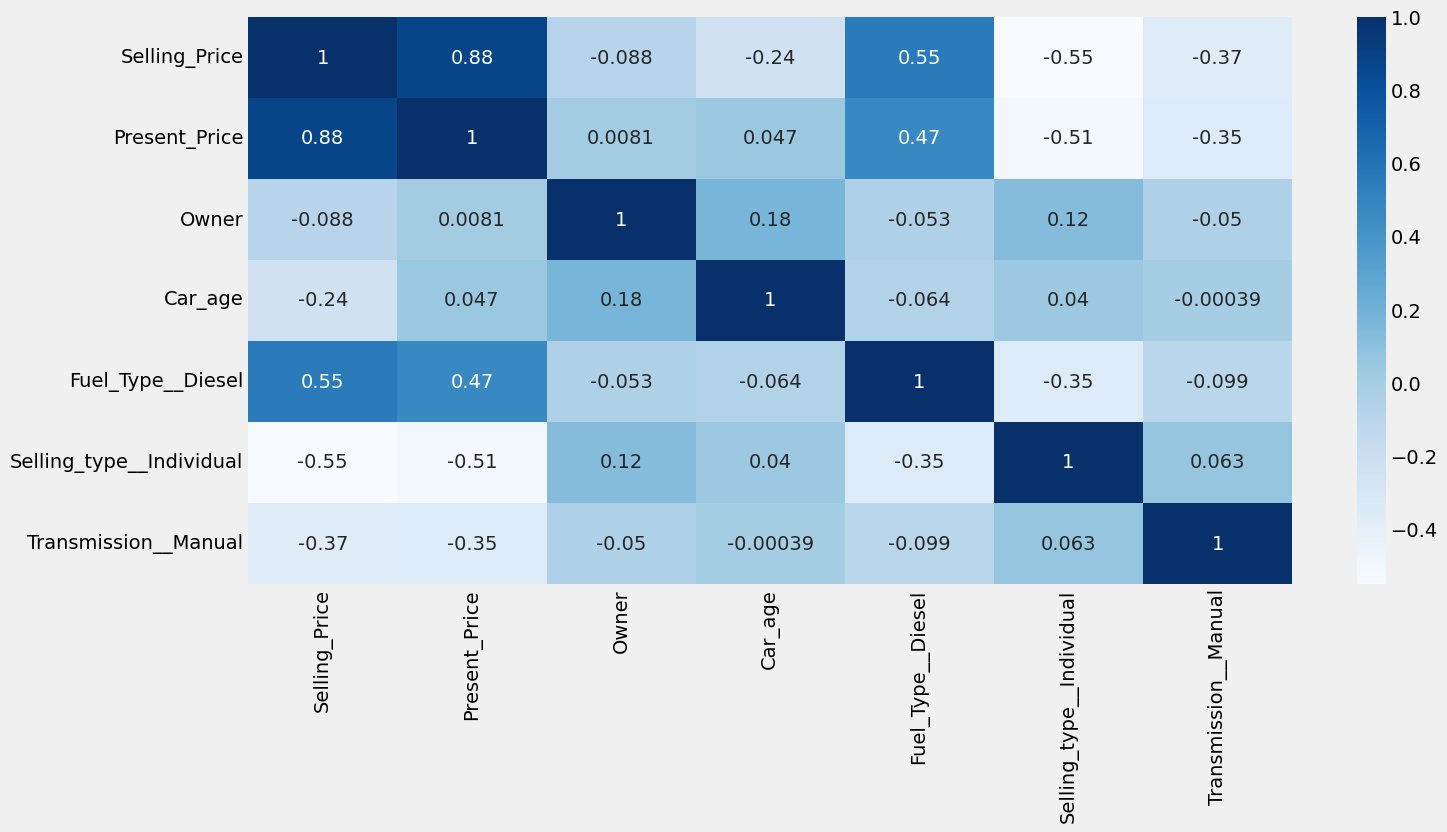

In [17]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(df_no_multicolinearity.corr(), annot=True,cmap='Blues')

**Feature Importance**

Each feature in your data is given a score based on feature importance; the higher the score, the more significant or pertinent the feature is to our target variable.


In [18]:
X = df_no_multicolinearity.drop('Selling_Price',axis=1)
y = df_no_multicolinearity['Selling_Price']

In [19]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,y)

ExtraTreesRegressor()

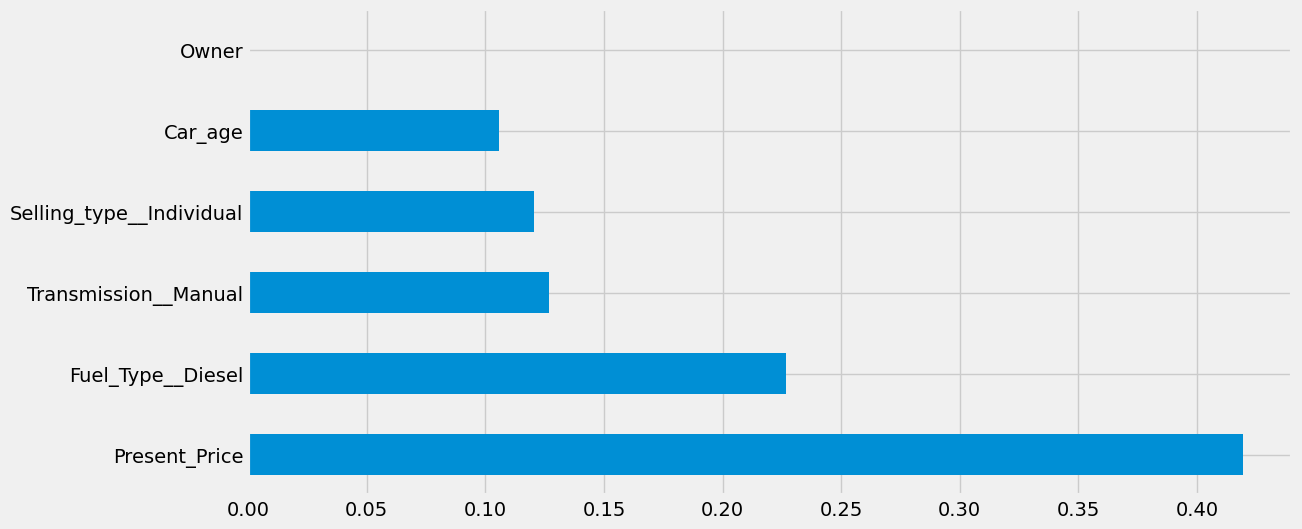

In [20]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [21]:
print(feat_importances.sort_values(ascending=False))

Present_Price               0.419246
Fuel_Type__Diesel           0.226788
Transmission__Manual        0.126823
Selling_type__Individual    0.120347
Car_age                     0.105899
Owner                       0.000898
dtype: float64


In [22]:
# Selecting useful features.
final_df = df_no_multicolinearity[['Selling_Price', 'Present_Price','Car_age','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type__Diesel,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,9,0,0,1
1,4.75,9.54,10,1,0,1
2,7.25,9.85,6,0,0,1
3,2.85,4.15,12,0,0,1
4,4.60,6.87,9,1,0,1


# Model Development

In [23]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

**Feature Scaling**

In [24]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['Present_Price','Car_age']])
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [25]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

**Training and Testing Data**

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((240, 5), (240,), (61, 5), (61,))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models = [lr,tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))

    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.8843830218270095
Predictions are : [ 2.85090216  8.12803353  6.41650528 -0.72103319  9.01800124  7.45747829
  1.32336542  0.65668224  1.34213912  7.4813302   9.09094746  0.49298142
  8.12866516  3.24051879  6.83169728  3.16976577  0.19714116 10.69155693
  1.75733112  2.3029391   0.17755181  8.07727328  6.41650528  2.38200739
  0.70357043  3.5644606   5.30530948  2.68891188  2.15374942  1.7513451
  0.20184841  9.20766793 -0.97424783  2.05714484  8.66976944  4.48435841
  7.34281425  7.35723323  2.96516278  7.7425873   3.60354714  4.10888459
  4.22860468  0.6268443   7.32533886  0.37789223  7.29764953 11.06720188
  3.04615146  5.30397652  6.58815672  2.15374942 20.47942208 16.80427774
  7.66208128  9.62400888  4.34541732  9.01503698  1.41857615  7.45010211
  0.11361337]
R2 score is : 0.8520804961634096
MAE : 1.2079557192958417
MSE : 3.407412232827173
RMSE : 1.8459177210339504
           Model Name  R2 score       MAE       MSE      RMSE
0  L

# Model Comparison

In [29]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
3,GradientBoostingRegressor,0.971470,0.497306,0.657212,0.810686
2,RandomForestRegressor,0.969985,0.554315,0.691417,0.831515
4,XGBRegressor,0.964020,0.529396,0.828820,0.910396
1,DecisionTreeRegressor,0.929188,0.746885,1.631194,1.277182
0,LinearRegression,0.852080,1.207956,3.407412,1.845918


**Trainning data with GradientBoostingRegressor**

In [30]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
df_copy = df.copy()
res = df_copy.merge(out,left_index=True,right_index=True)
res.head(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age,Price_actual,Price_pred
5,9.25,9.83,2071,Diesel,Dealer,Manual,0,5,9.25,8.273881
7,6.50,8.61,33429,Diesel,Dealer,Manual,0,8,6.50,6.737466
9,7.45,8.92,42367,Diesel,Dealer,Manual,0,8,7.45,6.550065
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,7,7.75,8.349544
24,2.90,4.41,56879,Petrol,Dealer,Manual,0,10,2.90,2.631044
25,3.00,4.99,20000,Petrol,Dealer,Manual,0,12,3.00,2.548274
33,6.00,9.95,45000,Diesel,Dealer,Manual,0,9,6.00,6.676303
42,1.95,7.15,58000,Petrol,Dealer,Manual,0,15,1.95,2.732159
45,7.50,12.04,15000,Petrol,Dealer,Automatic,0,9,7.50,7.303033
46,2.65,4.89,64532,Petrol,Dealer,Manual,0,10,2.65,2.646367



* Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
* Car age is effecting negatively as older the car lesser the Selling Price.
* Selling Price of cars with Fuel type Diesel is higher.
* Car of Manual type is of less priced whereas of Automatic type is high.
* Cars sold by Individual tend to get less Selling Price when sold by Dealers.

# Prediction of Selling Price

In [33]:
# Mapping for Fuel_Type
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 0}

# Function to get user input and predict selling price
def predict_price(model, scaler, fuel_type_mapping):
    print("Enter the details for the car:")
    present_price = float(input("Present Price: "))
    car_age = int(input("Car Age: "))
    fuel_type = input("Fuel Type (Petrol, Diesel, CNG): ").capitalize()
    selling_type_individual = int(input("Is it an Individual Selling? (1 for Yes, 0 for No): "))
    transmission_manual = int(input("Is it a Manual Transmission? (1 for Yes, 0 for No): "))

    # Map fuel type to dummy variables
    fuel_type_dummy = [fuel_type_mapping.get(fuel_type, 0)]

    # Scale the input features
    input_features = scaler.transform([[present_price, car_age]])
    input_features = np.concatenate([input_features.flatten(), fuel_type_dummy, [selling_type_individual, transmission_manual]])

    # Make the prediction
    predicted_price = model.predict([input_features])[0]

    print(f"\nPredicted Selling Price: {predicted_price:.2f} Lakhs")

# Get user input and make predictions
predict_price(final_model, scaler, fuel_type_mapping)


Enter the details for the car:
Present Price: 5.59
Car Age: 9
Fuel Type (Petrol, Diesel, CNG): Petrol
Is it an Individual Selling? (1 for Yes, 0 for No): 0
Is it a Manual Transmission? (1 for Yes, 0 for No): 1

Predicted Selling Price: 3.37 Lakhs
